# Regresi Linier

## Definisi Regresi Linier

Regresi linier adalah metode statistik yang memodelkan hubungan antara variabel bebas dan terikat dengan mencari pola garis lurus yang paling optimal dari data observasi. Salah satu metode yang paling umum digunakan adalah dengan mencari nilai minimum dari jumlah akar kuadrat dari residu. Residu yang dimaksud adalah selisih varibel terikat dari nilai yang diprediksi dengan nilai observasi.

Dengan menggunakan kasus pada Praktikum 1 materi Kecerdasan Buatan, kita akan menyelesaikan masalah regresi dengan pendekatan optimasi gradient descent.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset

Untuk tahapan awal, kita load dataset terlebih dahulu.

In [16]:
df = pd.read_csv("dataset/Salary_dataset.csv")

## Regresi Linier dengan satu variabel

Pada kasus ini, kita hanya menggunakan satu variabel bebas, yaitu variabel YearsExperience. Sedangkan variabel terikatnya adalah Salary. Maka, kita hilangkan kolom Unnamed terlebih dahulu.

In [17]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Untuk selanjutnya, variabel bebas kita sebut sebagai ```x```, sedangkan variabel terikat sebagai ```y```. Maka, kita memiliki:

In [18]:
x = df.YearsExperience
y = df.Salary


## Data Scaling
Di sini, data x dan y juga kita lakukan scaling dengan teknik MinMax. 

In [19]:

def scale(X):
    X_std = (X - min(X)) / (max(X) - min(X))
    return X_std



Dengan scaling, nilai awal x dan y diubah menjadi bentuk yang standar antara 0 hingga 1.

In [20]:
x_scaled = scale(x)
y_scaled = scale(y)


Setelah kita scaling, nilai x dan y kita plot ke bidang 2 dimensi

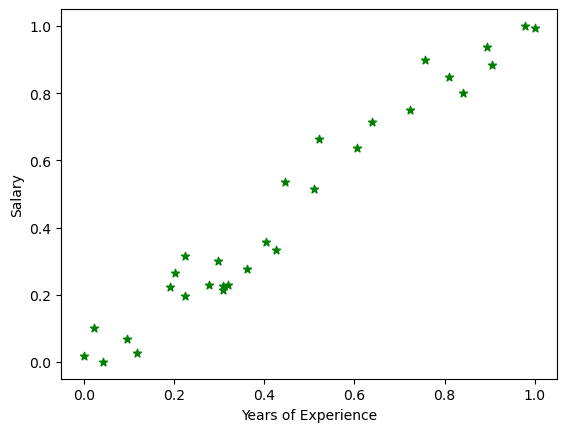

In [21]:
plt.scatter(x_scaled,y_scaled,color="g",marker="*")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("")
plt.show()

Untuk memudahkan dalam proses pelatihan, variabel bebas dan terikat dijadikan satu menjadi sebuah matrik.

In [22]:
dataset = np.array([x_scaled, y_scaled]).T
print(dataset.shape)

(30, 2)


## Data Training

Data training atau pelatihan data digunakan untuk mencari nilai optimal dari suatu parameter model. Untuk kasus ini, kita menggunakan optimasi gradient descent (GD). GD digunakan untuk mencari nilai Sum of Squarred Residual (SSR) terkecil dari masing-masing koefisien. 

Model dasar dari persamaan regresi linier adalah
```
y = mx + c
```
Dengan model ini, kita sudah memiliki $x$ dan $y$. Sedangkan nilai $m$ dan $c$ belum diketahui. Kita bisa mencari nilai $m$ dan $c$ dengan pendekatan gradient descent.

Untuk mencari nilai optimal dari $m$ dan $c$ dengan cara menghitung nilai $SSR$ dulu, yaitu:
\begin{equation}
SSR = \sum_{x = 1}^{n} (y_it - y_ip)^2
\end{equation}
di mana $y_p = mx + c$
sehingga:
\begin{equation}
SSR = \sum_{x = 1}^{n} (y_it - (mx_i + c)^2
\end{equation}
maka, kita bisa menghitung nilai $m$ dengan:
\begin{equation}
\frac{\partial SSR}{\partial m} = -2 \sum_{x = 1}^{n} x_i (y_it - mx_i - c)
\end{equation}

dan nilai $c$ dengan:
\begin{equation}
\frac{\partial SSR}{\partial c} = -2 \sum_{x = 1}^{n} (y_it - mx_i - c)
\end{equation}

Tidak perlu khawatir dengan kerumitan persamaan di atas. Di sini, akan kita bedah satu per satu.
$\frac{\partial SSR}{\partial m}$ bisa direpresentasikan dengan kode python berikut:
```python
sum_dSSR_dm = 0

for titik in dataset:
    x = titik[0]
    yt = titik[1]

    dSSR_dm = -2 * x * (yt - m * x - c)

    sum_dSSR_dm += dSSR_dm
```

sedangkan $\frac{\partial SSR}{\partial c}$ bisa direpresentasikan dengan kode python berikut:
```python
sum_dSSR_dc = 0

for titik in dataset:
    x = titik[0]
    yt = titik[1]

    dSSR_dc = -2 * (yt - m * x - c)

    sum_dSSR_dc += dSSR_dc
```

nilai akhir dari masing-masing $\frac{\partial SSR}{\partial m}$ dan $\frac{\partial SSR}{\partial c}$ digunakan untuk mengupdate nilai $m$ dan $c$. Adapun proses update ini menggunakan teknik gradient descent sebagai berikut:
\begin{equation}
\theta_i = \theta_i - \mu \frac{\partial}{\partial \theta_i}  J(\theta)
\end{equation}
di mana $\theta$ adalah parameter yang akan diupdate, $\mu$ adalah learning rate. Apabila diterjemahkan ke kode python, maka menjadi seperti berikut:


A. Update nilai $m$
```python
learning_rate = 0.01
m = 0

for i in range(0, NUM_OF_EPOCH):
    ...
    step_size = sum_dSSR_dm * learning_rate
    m = m - step_size
```

B. Update nilai $c$
```python
learning_rate = 0.01
c = 0
for i in range(0, NUM_OF_EPOCH):
    ...
    step_size = sum_dSSR_dc * learning_rate
    c = c - step_size
```

Apabila digabungkan semua, maka seluruh fungsi train adalah sebagai berikut:

In [23]:

def train(dataset, epochs=1000):
    NUM_OF_EPOCH = epochs

    m = np.random.randint(0, 100)
    c = np.random.randint(0, 100)

    learning_rate = 0.01
    print("m awal: ", m)
    print("c awal: ", c)
    
    
    
    for i in range(0, NUM_OF_EPOCH):
        # SSR terhadap c
        # SSR terhadap m

        sum_dSSR_dc = 0
        sum_dSSR_dm = 0

        for titik in dataset:
            x = titik[0]
            yt = titik[1]
            
            
            dSSR_dc = -2 * (yt - m * x - c)
            dSSR_dm = -2 * x * (yt - m * x - c)

            sum_dSSR_dc += dSSR_dc
            sum_dSSR_dm += dSSR_dm


        ## update nilai c dan m berdasarkan learning rate/laju dan sum_dSSR_dc dan sum_dSSR_dm
        step_size = sum_dSSR_dc * learning_rate
        c = c - step_size

        step_size = sum_dSSR_dm * learning_rate
        m = m - step_size

#         print("update ke ", i, " untuk m adalah ",m)
#         print("update ke ", i, " untuk c adalah ",c)

    # y = mx + c

    print("m optimal/akhir: ", m)
    print("c optimal/akhir: ", c)
    
    return m, c

    
    

## Proses data latih untuk mencari nilai $m$ dan $c$ yang optimal

In [24]:
m, c = train(dataset)

m awal:  46
c awal:  97
m optimal/akhir:  1.0492516633791347
c optimal/akhir:  -0.018235781333931552


## Hasil dari nilai $m$ dan $c$ yang optimal

Berikut ini adalah hasil akhir dari model regresi linier. Dengan model ini, kita bisa memprediksi dengan data diluar data observasi.

In [25]:
print("y = ",m,"x + ",c)

y =  1.0492516633791347 x +  -0.018235781333931552


## Visualisasi Persamaan Regresi Linier

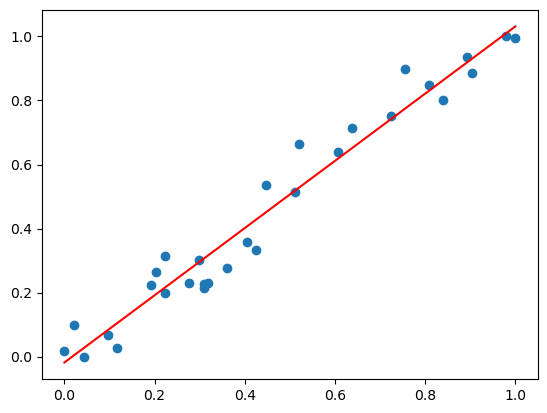

In [26]:
x1 = 0
y1 = m * x1 +  c

x2 = 1
y2 = m * x2 +  c

x = np.array([x1, x2])
y = np.array([y1, y2])
# print(y1)
# print(x, y)
plt.scatter(dataset[:,0], dataset[:,1])
plt.plot(x, y, color='r')
plt.show()

# Mengukur tingkat performa regresi

Pengukuran performa dari regresi merupakan langkah yang penting untuk mengetahui seberapa bagus model yang dikembangkan sesuai dengan data dan dalam memprediksi. 

Di sini, kita akan mengukur performa regresi dengan koefisien determinasi $R^2$. Dalam konteks regresi, ini adalah pengukuran dalam statistik tentang seberapa baik garis regresi mendekati data aktual. Oleh karena itu, hal ini penting ketika model statistik digunakan untuk memprediksi hasil di masa depan atau untuk pengujian hipotesis.

$R^2$ dihitung dengan persamaan:
\begin{equation}
R^2 = 1 - \frac{SSR}{SST}
\end{equation}
di mana $SSR$ adalah Sum of Squarred Residuals dan $SST$ adalah Sum of Total. SST dihitung dengan:
\begin{equation}
SST = \sum_{i=1}^{n} (y_it - \overline{yt})^2
\end{equation}

Berikut adalah contoh kode untuk menghitung nilai $R^2$ dari model regresi yang sudah dilatih

In [27]:
y_mean = np.mean(y_scaled)
sum_ssr = 0
sum_sst = 0
for titik in dataset:
    x = titik[0]
    yt = titik[1]
    
    yp = (m * x + c)
    
    ssr = np.square(yt - yp)
    
    sst = np.square(yt - y_mean)
    sum_ssr += ssr
    sum_sst += sst
    
r2 = 1 - (sum_ssr / sum_sst)
print("R Square: ", r2)

R Square:  0.9569566641435086


# Post-Test

1. Jelaskan konsep dasar regresi linier. Bagaimana model regresi linier merepresentasikan hubungan antara variabel independen dan dependen? Berikan contoh sederhana untuk menggambarkannya.

1. Diskusikan asumsi-asumsi yang mendasari regresi linier. Mengapa penting untuk memeriksa asumsi-asumsi ini sebelum menginterpretasikan hasil analisis regresi? Berikan wawasan tentang konsekuensi potensial dari pelanggaran asumsi-asumsi ini.

1. Mengeksplorasi metrik yang umum digunakan untuk mengevaluasi kinerja model regresi linier. Diskusikan pentingnya metrik seperti Mean Squared Error (MSE) dan $R^2$ dalam menilai kesesuaian model. Berikan contoh untuk mengilustrasikan penerapannya.